## Motive

- In this notebook we will understand more about the Precision Recall curve
- When to use ROC curve and when to use Precision Recall curve.
 
- We will be using Unbalanced Dataset for this 

In [1]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from numpy import sqrt
from numpy import argmax

from sklearn.metrics import confusion_matrix,classification_report

#### Difference btw ROC & Precision Recall Curve.

1. 
    a.**ROC Curve** represent the trade off between TRP & FPR
   
    b.**Precision Recall Curve** represent the trade off between Recall(TRP) and Positive prediction by our model.
   

2. a. **ROC Curve** is usualy used for balanced dataset.

   b. **Precision Recall Curve** is preferred for unbalanced dataset.

**NOTE:** We can calculate **AUC** score for both the plots. It is used as a summary of the model skill.

#### More on Precision Recall Curve

Precision Recall Curve is generally preferred for unbalanced dataset. The reason is as follows:

- The large majority class of 0 means that we have **high TN**
- And as we can see from the formula that we are never really using **TN** in the formula for both Precision & Recall.It is only concerned with the **correct prediction of the minority class, class 1**

In [15]:
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99,0.01], random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

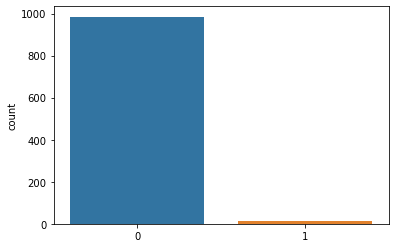

In [16]:
sns.countplot(y)

plt.savefig('1.png')
# show the plot
plt.show()

In [8]:
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

# predict class values
yhat = model.predict(testX)

In [9]:
def print_metric(y_test,y_pred):
    ((tn, fp), (fn, tp)) = confusion_matrix(y_test,y_pred)
    ((tnr,fpr),(fnr,tpr))= confusion_matrix(y_test,y_pred, normalize='true')
    res=pd.DataFrame([[f'TN = {tn} (TNR = {tnr:1.2%})', 
                                f'FP = {fp} (FPR = {fpr:1.2%})'], 
                         [f'FN = {fn} (FNR = {fnr:1.2%})', 
                                f'TP = {tp} (TPR = {tpr:1.2%})']],
            index=['True 0', 'True 1'], 
            columns=['Pred 0', 
                            'Pred 1'])
    print(res)

In [10]:
print_metric(testy,yhat)

                          Pred 0                Pred 1
True 0  TN = 489 (TNR = 100.00%)  FP = 0 (FPR = 0.00%)
True 1   FN = 11 (FNR = 100.00%)  TP = 0 (TPR = 0.00%)


##### We can see that our model being biased is able to predict only the Majority class=0

#### ROC Curve for Unbalanced Dataset.

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.716


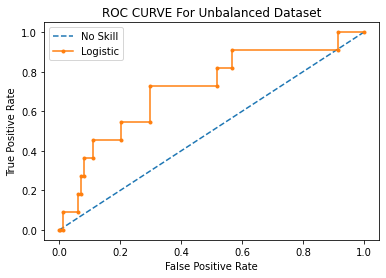

In [11]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
plt.title('ROC CURVE For Unbalanced Dataset')

plt.savefig('2.png')
# show the plot
plt.show()

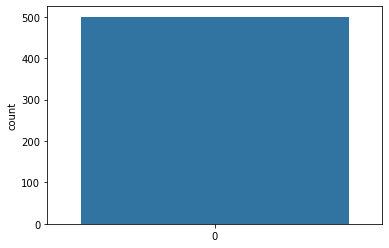

In [12]:
sns.countplot(model.predict(testX))

plt.savefig('3.png')
# show the plot
plt.show()

##### If we review the predictions, we will see that the model predicts the majority class (class 0) in all cases on the test set. The score is very misleading. 
This is happening because ROC Curve focuses majorily on majority class which in our case =0 hence we have high TN

#### Precision Recall Curve for Unbalanced Dataset.

Logistic: f1=0.000 auc=0.054


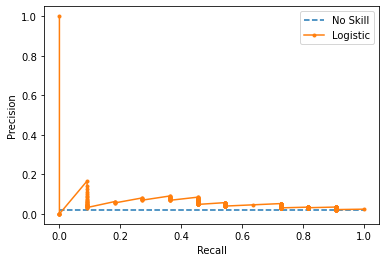

In [14]:
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(testX)
# calculate precision and recall for each threshold
lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)
# calculate scores
lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(testy[testy==1]) / len(testy)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot

plt.savefig('4.png')
plt.show()

#### Conclusion

- We can see that From ROC curve we were getting an **AUC score of 0.716** on unbalanced dataset.While with Precision Recall curve we are actually getting **AUC score of 0.054**.

- We can see that the model is penalized for predicting the majority class in all cases. The scores show that the model that looked good according to the ROC Curve is in fact barely skillful when considered using using precision and recall that focus on the positive class.

- The plot of the precision-recall curve highlights that the model is just barely above the no skill line for most thresholds.

https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/